#Instalação de Pacotes

In [ ]:
install.packages("dplyr")
install.packages('plyr')
install.packages('car')
#install.packages("corrplot")
#install.packages("caret")
#install.packages("caretEnsemble")
install.packages("ggplot2")
#install.packages("randomForest")
#install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(plyr)
#library(car)
#library(corrplot)
#library(caret)
#library(caretEnsemble)
library(ggplot2)
#library(randomForest)
#library(xgboost)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




#Inserção dos dados 

In [ ]:
df <- read.csv('oasis_longitudinal.csv')
head(df)
#df

,Subject.ID,MRI.ID,Group,Visit,MR.Delay,M.F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1987,0.696,0.883
2,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004,0.681,0.876
3,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NA,23,0.5,1678,0.736,1.046
4,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NA,28,0.5,1738,0.713,1.010
5,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NA,22,0.5,1698,0.701,1.034
6,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0.0,1215,0.710,1.444


In [ ]:
dim(df)
print('/n')
str(df)
print('/n')
summary(df)

#Drop hand
table(df$Hand)
df$Hand<-NULL

#Drop Ids
subject_id<-df$Subject.ID
MRI_id<-df$MRI.ID

df$Subject.ID<-NULL
df$MRI.ID<-NULL

[1] 373  15

[1] "/n"
'data.frame':	373 obs. of  15 variables:
 $ Subject.ID: chr  "OAS2_0001" "OAS2_0001" "OAS2_0002" "OAS2_0002" ...
 $ MRI.ID    : chr  "OAS2_0001_MR1" "OAS2_0001_MR2" "OAS2_0002_MR1" "OAS2_0002_MR2" ...
 $ Group     : chr  "Nondemented" "Nondemented" "Demented" "Demented" ...
 $ Visit     : int  1 2 1 2 3 1 2 1 2 3 ...
 $ MR.Delay  : int  0 457 0 560 1895 0 538 0 1010 1603 ...
 $ M.F       : chr  "M" "M" "M" "M" ...
 $ Hand      : chr  "R" "R" "R" "R" ...
 $ Age       : int  87 88 75 76 80 88 90 80 83 85 ...
 $ EDUC      : int  14 14 12 12 12 18 18 12 12 12 ...
 $ SES       : int  2 2 NA NA NA 3 3 4 4 4 ...
 $ MMSE      : int  27 30 23 28 22 28 27 28 29 30 ...
 $ CDR       : num  0 0 0.5 0.5 0.5 0 0 0 0.5 0 ...
 $ eTIV      : int  1987 2004 1678 1738 1698 1215 1200 1689 1701 1699 ...
 $ nWBV      : num  0.696 0.681 0.736 0.713 0.701 0.71 0.718 0.712 0.711 0.705 ...
 $ ASF       : num  0.883 0.876 1.046 1.01 1.034 ...
[1] "/n"


  Subject.ID           MRI.ID             Group               Visit      
 Length:373         Length:373         Length:373         Min.   :1.000  
 Class :character   Class :character   Class :character   1st Qu.:1.000  
 Mode  :character   Mode  :character   Mode  :character   Median :2.000  
                                                          Mean   :1.882  
                                                          3rd Qu.:2.000  
                                                          Max.   :5.000  
                                                                         
    MR.Delay          M.F                Hand                Age       
 Min.   :   0.0   Length:373         Length:373         Min.   :60.00  
 1st Qu.:   0.0   Class :character   Class :character   1st Qu.:71.00  
 Median : 552.0   Mode  :character   Mode  :character   Median :77.00  
 Mean   : 595.1                                         Mean   :77.01  
 3rd Qu.: 873.0                                 


  R 
373 

In [ ]:
sort(apply(df, 2, function(x){sum(is.na(x))}), decreasing = TRUE)

table(df$SES)

SES     MMSE    Group    Visit MR.Delay      M.F      Age     EDUC 
      19        2        0        0        0        0        0        0 
     CDR     eTIV     nWBV      ASF 
       0        0        0        0


  1   2   3   4   5 
 88 103  82  74   7 

In [ ]:
df <- df[order(df$Group),]
head(df)
#df %>% group_by(MMSE) %>% arrange(Group) 
count(df, 'Group')

df1 <- df[order(df$Group),][c(0:37),c(1,11,12)]
#df1
df2 <- df[order(df$Group),][c(38:183),c(1,11,12)]
#df2
df3 <- df[order(df$Group),][c(184:373),c(1,11,12)]
#df3

,Group,Visit,MR.Delay,M.F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
34,Converted,1,0,F,87,14,1,30,0.0,1406,0.715,1.248
35,Converted,3,489,F,88,14,1,29,0.0,1398,0.713,1.255
36,Converted,4,1933,F,92,14,1,27,0.5,1423,0.696,1.234
37,Converted,1,0,M,80,20,1,29,0.0,1587,0.693,1.106
38,Converted,2,756,M,82,20,1,28,0.5,1606,0.677,1.093
39,Converted,3,1563,M,84,20,1,26,0.5,1597,0.666,1.099


Group,freq
<chr>,<int>
Converted,37
Demented,146
Nondemented,190


#Teste Shapiro para a Variável ASF

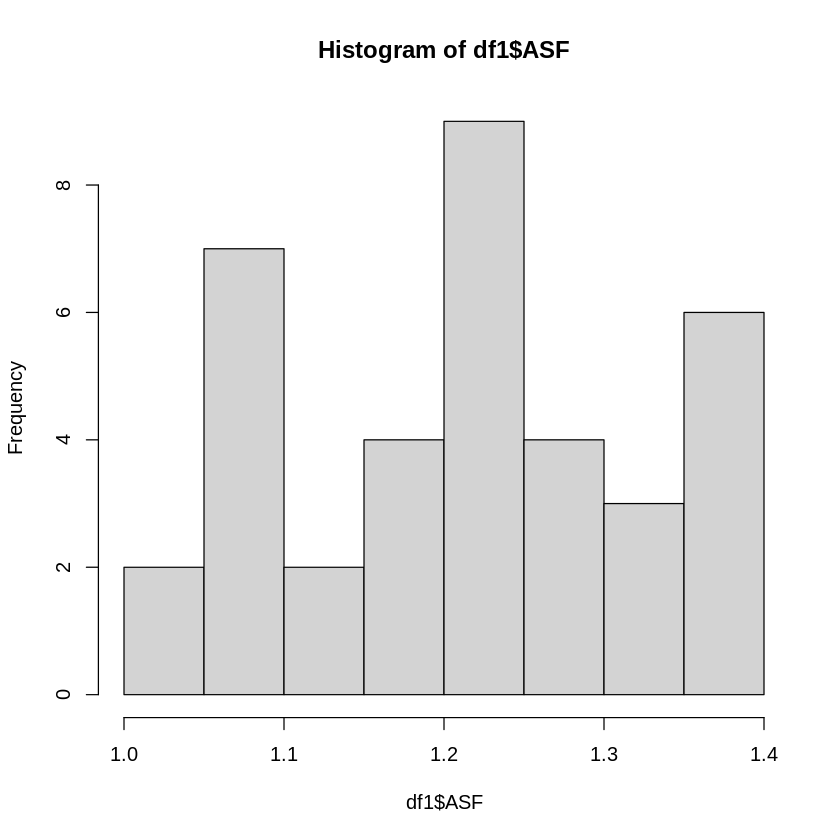

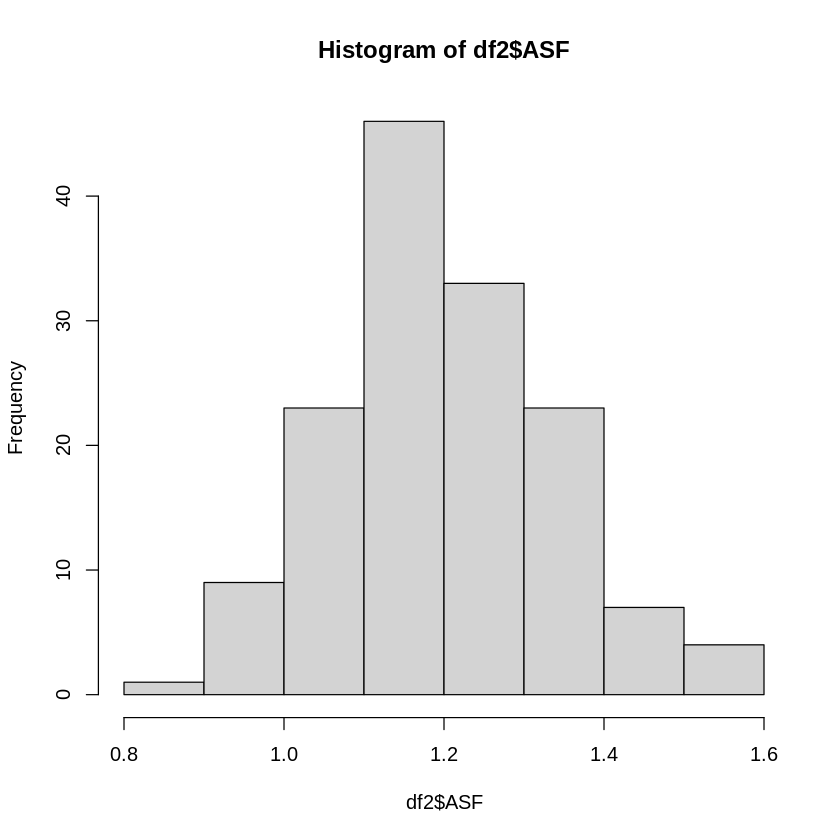

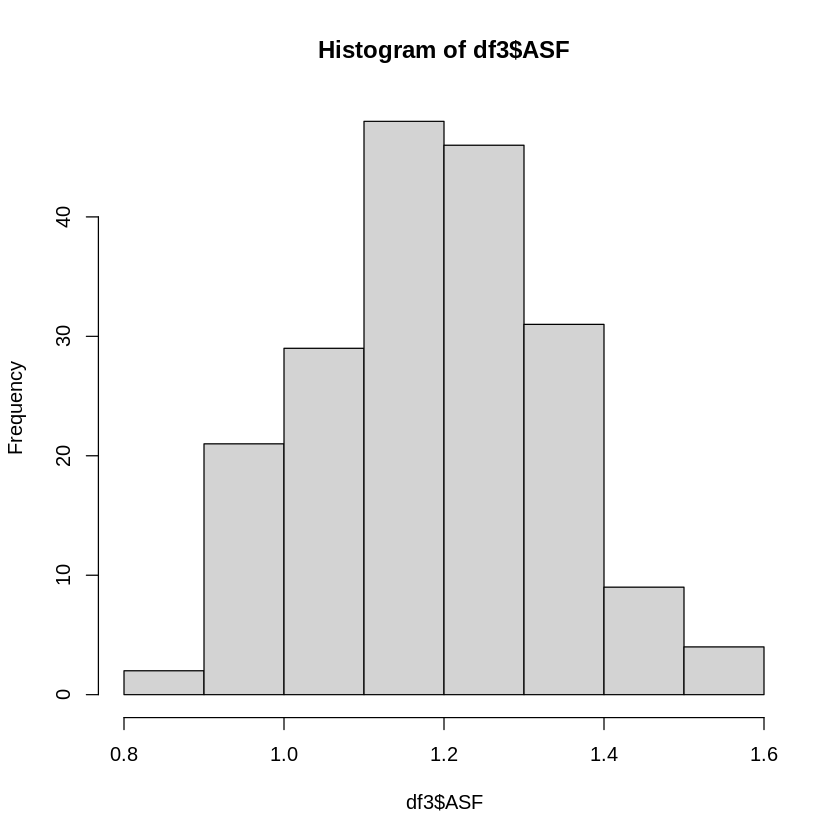

In [ ]:
hist(df1$ASF)
hist(df2$ASF)
hist(df3$ASF)

In [ ]:
shapiro.test(df1$ASF)
shapiro.test(df2$ASF)
shapiro.test(df3$ASF)


	Shapiro-Wilk normality test

data:  df1$ASF
W = 0.94229, p-value = 0.05457



	Shapiro-Wilk normality test

data:  df2$ASF
W = 0.98454, p-value = 0.1009



	Shapiro-Wilk normality test

data:  df3$ASF
W = 0.9857, p-value = 0.05095


#Teste Shapiro para a Variável nWBV

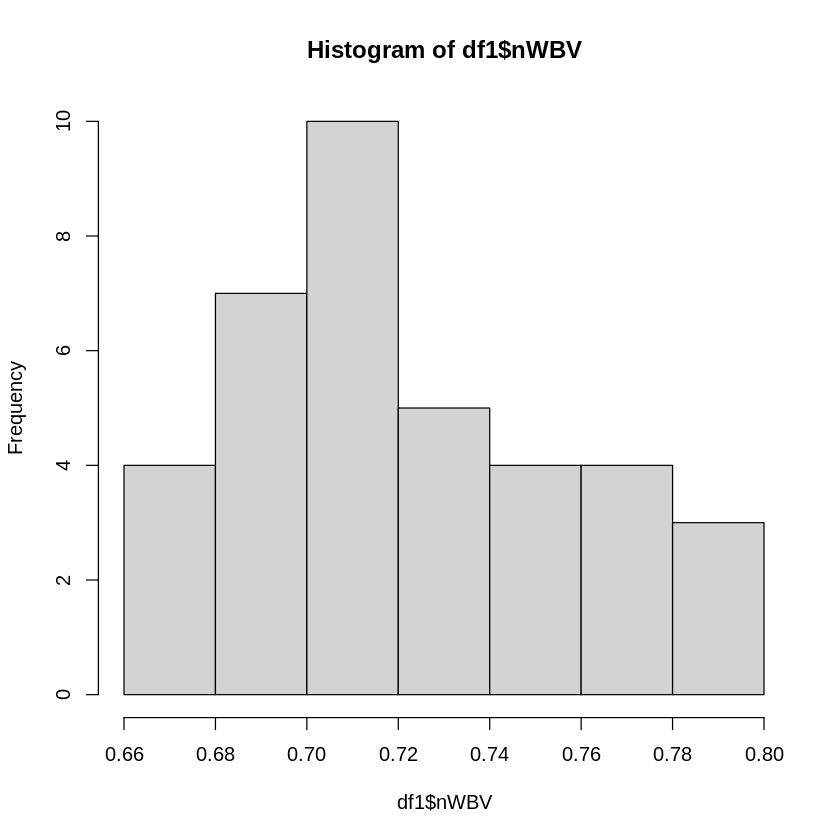

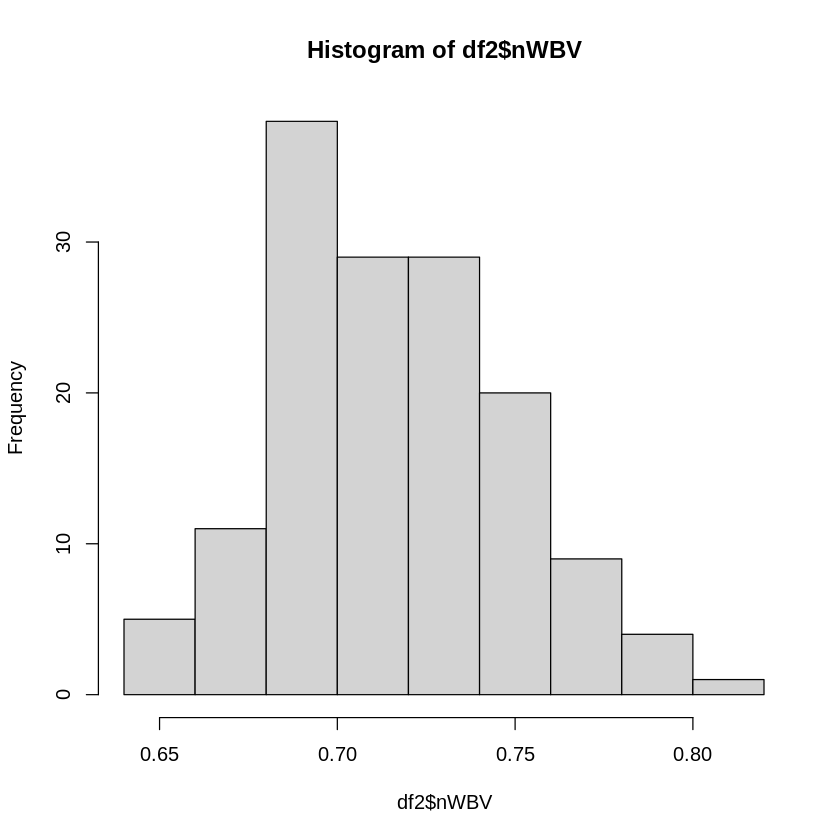

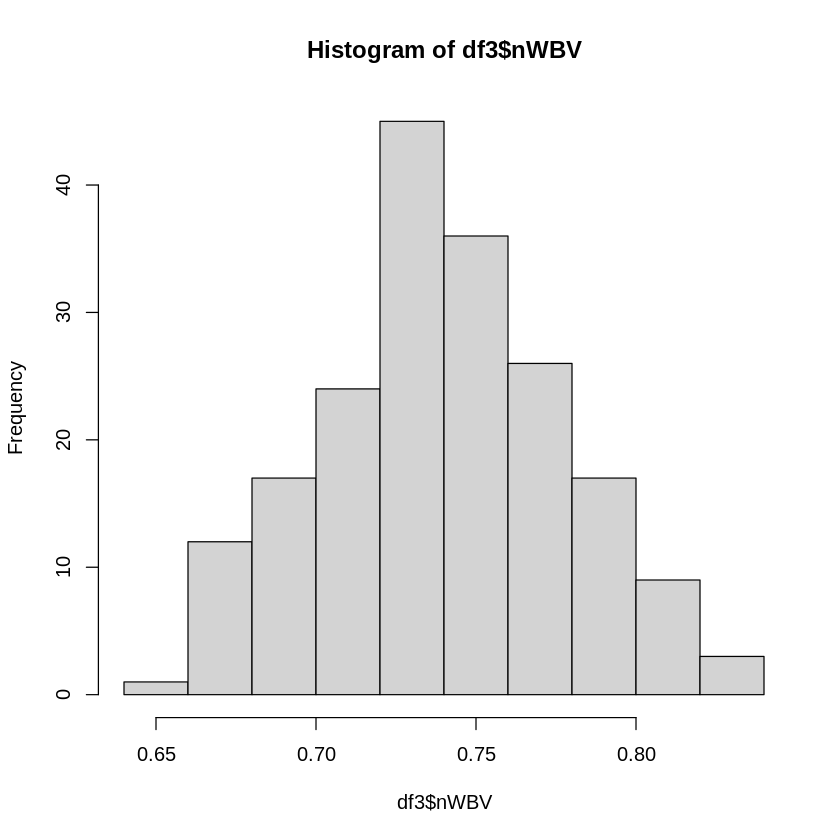

In [ ]:
hist(df1$nWBV)
hist(df2$nWBV)
hist(df3$nWBV)

In [ ]:
shapiro.test(df1$nWBV)
shapiro.test(df2$nWBV)
shapiro.test(df3$nWBV)


	Shapiro-Wilk normality test

data:  df1$nWBV
W = 0.95976, p-value = 0.1985



	Shapiro-Wilk normality test

data:  df2$nWBV
W = 0.98686, p-value = 0.1818



	Shapiro-Wilk normality test

data:  df3$nWBV
W = 0.99489, p-value = 0.7654


#BoxPlot teste de Variavel Random

Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`



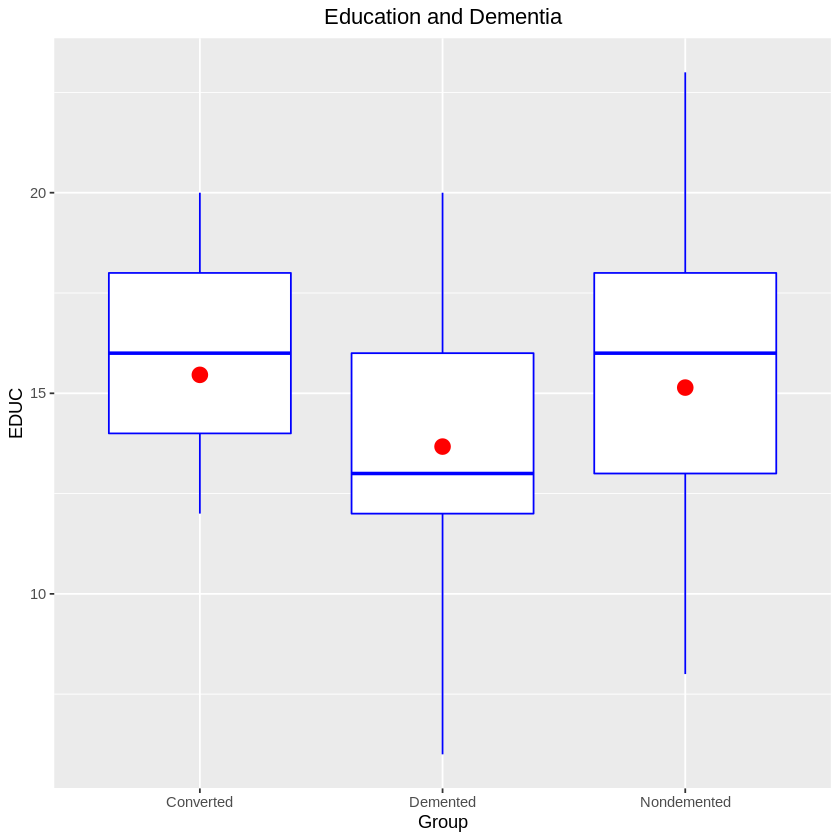

In [ ]:
ggplot(df, aes(Group, EDUC))+
  geom_boxplot(col = "blue")+
  geom_point(stat = "summary", fun.y = "mean", col = "red", size = 4)+
  ggtitle("Education and Dementia")+
  theme(plot.title = element_text(hjust = .5))

#No real difference
#ggplot(MRI_data, aes(M.F, EDUC))+
#  geom_boxplot(col = "blue")+
#  ggtitle("Years of Education by Sex")+
#  theme(plot.title = element_text(hjust = .5))

#Anova para nWBV

In [ ]:
anova_one_way <- aov(nWBV~Group, data = df)
summary(anova_one_way)

anova(aov(ASF~Group, data = df))

             Df Sum Sq  Mean Sq F value   Pr(>F)    
Group         2 0.0514 0.025678   20.58 3.35e-09 ***
Residuals   370 0.4616 0.001248                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Group,2,0.01459628,0.007298139,0.3814422,0.6831441
Residuals,370,7.07921641,0.019133017,NA,NA
